<a href="https://colab.research.google.com/github/MRnickRuss/AI/blob/main/Pr5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1. Использование предобученной модели

### 1.1. Выберите и импортируйте предобученную модель СНС для решения задач классификации из имеющихся в Keras: https://keras.io/api/applications/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
from io import BytesIO
from PIL import Image
from urllib.request import urlopen
from imutils import paths
import os
import random
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, AveragePooling2D, BatchNormalization, Activation
from keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
model = keras.applications.ResNet152()

model.summary() # Краткое описание архитектуры
model.get_config() # Конфигурации созданной модели

242900224/242900224 [==============================] - 2s 0us/step
Model: "resnet152"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                   

{'name': 'resnet152',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 224, 224, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'registered_name': None,
   'name': 'input_1',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'ZeroPadding2D',
   'config': {'name': 'conv1_pad',
    'trainable': True,
    'dtype': 'float32',
    'padding': ((3, 3), (3, 3)),
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 224, 224, 3)},
   'name': 'conv1_pad',
   'inbound_nodes': [[['input_1', 0, 0, {}]]]},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'conv1_conv',
    'trainable': True,
    'dtype': 'float32',
    'filters': 64,
    'kernel_size': (7, 7),
    'strides': (2, 2),
    'padding': 'valid',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1)

### 1.2. Загрузите из сети Интернет 5 изображений с разными классами, из тех, что приведены в [списке](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), и сохраните их представление в список images

### 1.3. Напишите функцию, принимающую на вход список с исходными изображениями и возвращающую список с преобразованными изображениями под формат входных данных выбранной Вами модели СНС (нормализация).

(Не забудьте создать независимую копию исходного списка в теле функции, для обработки именно независимой копии, а не оригинального списка)

In [4]:
def normalize(images, shape):
  proc_images = np.array(images)
  proc_images = cv2.resize(proc_images, (shape[0], shape[1]))
  proc_images = proc_images.reshape(shape[0], shape[1], shape[2])
  return proc_images

def normalize_for_pred(images, shape, flag = True):
  proc_images = np.array(images)
  proc_images = cv2.resize(proc_images, (shape[0], shape[1]))
  if not flag:
    proc_images = proc_images.reshape(-1, shape[0], shape[1], shape[2])
  return proc_images
    # proc_images = keras.applications.DenseNet169.preprocess_input(proc_images)

In [5]:
images = []
images_for_preds = []
labels = []
imagePaths = sorted(list(paths.list_images("/content/gdrive/MyDrive/Five_Pictures")))

for imagePath in imagePaths:

  image = cv2.imread(imagePath)
  image = normalize(image, (224, 224, 3))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  images.append(image) # добавляем в список

  image_for_pred = cv2.imread(imagePath)
  image_for_pred = normalize_for_pred(image_for_pred, (224, 224, 3))
  images_for_preds.append(image_for_pred) # добавляем в список

  label = (imagePath.split(os.path.sep)[-1]).split('.')[0]
  labels.append(label) # обновляем список меток

len(imagePaths), imagePaths

(5,
 ['/content/gdrive/MyDrive/Five_Pictures/Bottle_of_Whiskey.jpg',
  '/content/gdrive/MyDrive/Five_Pictures/Bottle_of_Wine.png',
  '/content/gdrive/MyDrive/Five_Pictures/Football_Helmet.jpg',
  '/content/gdrive/MyDrive/Five_Pictures/MIG-33_istrebitel.jpg',
  '/content/gdrive/MyDrive/Five_Pictures/Tank_Leklerk.jpg'])

### 1.5. Выведите изображения и соответствующие им классы (как в примере из теории)

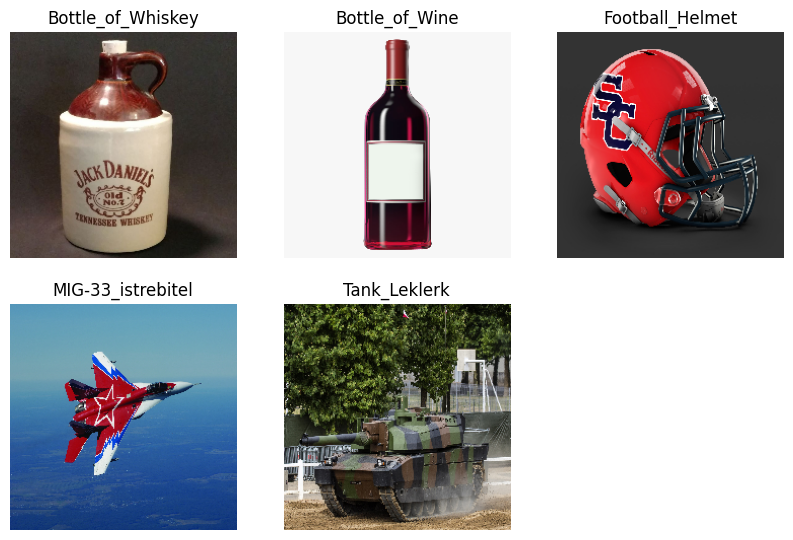

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(5):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis("off")

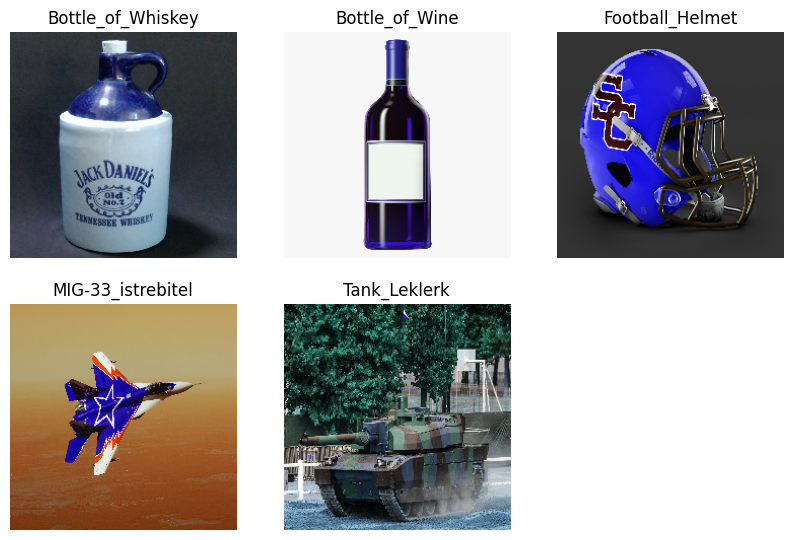

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(5):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images_for_preds[i])
    plt.title(labels[i])
    plt.axis("off")

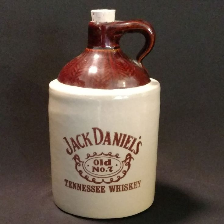

1/1 [==============================] - 6s 6s/step


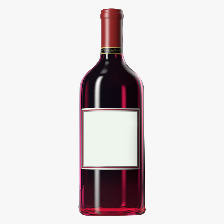

1/1 [==============================] - 0s 485ms/step


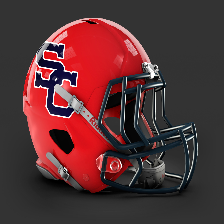

1/1 [==============================] - 0s 493ms/step


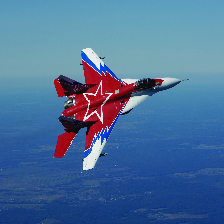

1/1 [==============================] - 0s 488ms/step


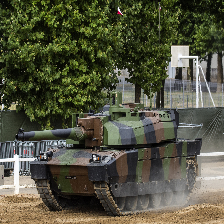

1/1 [==============================] - 0s 486ms/step
[[('n04579145', 'whiskey_jug', 0.99998856), ('n04522168', 'vase', 4.7784597e-06), ('n03950228', 'pitcher', 2.989226e-06)]]
Bottle_of_Whiskey
[[('n07892512', 'red_wine', 0.7778396), ('n04591713', 'wine_bottle', 0.22206599), ('n03109150', 'corkscrew', 7.493326e-05)]]
Bottle_of_Wine
[[('n03379051', 'football_helmet', 0.99992585), ('n03127747', 'crash_helmet', 7.3662144e-05), ('n02807133', 'bathing_cap', 1.8925905e-07)]]
Football_Helmet
[[('n04552348', 'warplane', 0.54796934), ('n03944341', 'pinwheel', 0.38553208), ('n04592741', 'wing', 0.042472295)]]
MIG-33_istrebitel
[[('n04389033', 'tank', 0.9950448), ('n02704792', 'amphibian', 0.0041756593), ('n03478589', 'half_track', 0.0003505709)]]
Tank_Leklerk


In [13]:
preds =[]
for image in images_for_preds:
  image = image.reshape(1, 224, 224, 3)
  cv2_imshow(image[0,:, :])
  preds.append(model.predict(image))

for i in range(len(preds)):
  print(keras.applications.resnet.decode_predictions(preds[i], top=3))
  print(labels[i])

# Задание 2. Использование обученной модели для работы со своим датасетом

### 2.1. Выберите и импортируйте предобученную модель СНС для решения задач классификации из имеющихся в Keras: https://keras.io/api/applications/

In [14]:
model = keras.applications.ResNet152()

model.summary() # Краткое описание архитектуры
model.get_config() # Конфигурации созданной модели

Model: "resnet152"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                      

{'name': 'resnet152',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 224, 224, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_4'},
   'registered_name': None,
   'name': 'input_4',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'ZeroPadding2D',
   'config': {'name': 'conv1_pad',
    'trainable': True,
    'dtype': 'float32',
    'padding': ((3, 3), (3, 3)),
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 224, 224, 3)},
   'name': 'conv1_pad',
   'inbound_nodes': [[['input_4', 0, 0, {}]]]},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'conv1_conv',
    'trainable': True,
    'dtype': 'float32',
    'filters': 64,
    'kernel_size': (7, 7),
    'strides': (2, 2),
    'padding': 'valid',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1)

### 2.2. Подготовка тренировочных данных. Разделение на обучающую и тестовую выборку

In [47]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [48]:
# Собираем список путей к каждому изображению и перемешиваем их
imagePaths = sorted(list(paths.list_images("/content/gdrive/MyDrive/archive_2/Data")))
random.shuffle(imagePaths)

In [49]:
def load_images(imagePaths):
  data = []
  labels = []

  for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (128, 128))
    data.append(image)
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

  return data, labels

In [50]:
from google.colab.patches import cv2_imshow
data, labels = load_images(imagePaths)

In [51]:
data = np.array(data, dtype='float')
labels = np.array(labels)

# data=data.reshape(len(data), compression_size, compression_size, 3)

print(data.shape)
print(labels.shape)

(3018, 128, 128, 3)
(3018,)


In [52]:
from sklearn.preprocessing import LabelBinarizer

(X_train, X_val, Y_train, Y_val) = train_test_split(data,
labels, test_size=0.25, random_state=42)

lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_val = lb.transform(Y_val)

X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((2263, 128, 128, 3), (755, 128, 128, 3), (2263, 4), (755, 4))

In [53]:
# (X_train, X_val, Y_train, Y_val) = train_test_split(
#     data,
#     labels,
#     test_size=0.25,
#     random_state=42)

# print(X_train.shape)
# print(Y_train.shape)

In [ ]:
# from sklearn.preprocessing import LabelBinarizer

In [ ]:
# lb = LabelBinarizer()
# Y_train = lb.fit_transform(Y_train)
# Y_val = lb.transform(Y_val)

# print(Y_train.shape)
# print(Y_val.shape)

# print(Y_train[:3])
# print(Y_val[:3])

(3, 1)
(2, 1)
[[0]
 [0]
 [0]]
[[0]
 [0]]


### 2.3. Обучение своей модели на основе предобученной модели "*название модели, выбранной в п.2.1.*"

In [54]:
model2 = keras.applications.ResNet152(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',
                   weights='imagenet')

model2.summary()

Model: "resnet152"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 134, 134, 3)          0         ['input_7[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 64, 64, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 64, 64, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                      

In [59]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, AveragePooling2D

model2.trainable = False # замораживаем все слои базовой модели

my_model = Sequential()
my_model.add(model2)
my_model.add(Flatten())
my_model.add(Dense(4096, activation='relu'))
my_model.add(BatchNormalization())
my_model.add(Dropout(0.5))
my_model.add(Dense(2048, activation='relu'))
my_model.add(Dense(1024, activation='relu'))
my_model.add(Dense(4, activation='softmax'))

my_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 2048)              58370944  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 4096)              8392704   
                                                                 
 batch_normalization_2 (Bat  (None, 4096)              16384     
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 4096)              0         
                                                                 
 dense_9 (Dense)             (None, 2048)              8390656   
                                                      

In [60]:
my_model.compile(
    optimizer=Adam(learning_rate=0.000002),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [61]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=2)

In [62]:
epochs=10
history = my_model.fit(
  X_train,
  Y_train,
  validation_data=(X_val, Y_val),
  epochs=epochs,
  callbacks=[early_stopping]
)

Epoch 1/10
71/71 [==============================] - 530s 7s/step - loss: 1.0318 - accuracy: 0.6014 - val_loss: 0.4740 - val_accuracy: 0.9589
Epoch 2/10
71/71 [==============================] - 528s 7s/step - loss: 0.3037 - accuracy: 0.9266 - val_loss: 0.1975 - val_accuracy: 0.9921
Epoch 3/10
71/71 [==============================] - 536s 8s/step - loss: 0.1716 - accuracy: 0.9673 - val_loss: 0.1045 - val_accuracy: 0.9934
Epoch 4/10
71/71 [==============================] - 527s 7s/step - loss: 0.1107 - accuracy: 0.9828 - val_loss: 0.0647 - val_accuracy: 0.9974
Epoch 5/10
71/71 [==============================] - 525s 7s/step - loss: 0.0834 - accuracy: 0.9881 - val_loss: 0.0474 - val_accuracy: 0.9987
Epoch 6/10
71/71 [==============================] - 500s 7s/step - loss: 0.0668 - accuracy: 0.9903 - val_loss: 0.0378 - val_accuracy: 0.9987
Epoch 7/10
71/71 [==============================] - 537s 8s/step - loss: 0.0574 - accuracy: 0.9912 - val_loss: 0.0313 - val_accuracy: 0.9987
Epoch 8/10
71

### 2.4. Визуализация процесса обучения модели

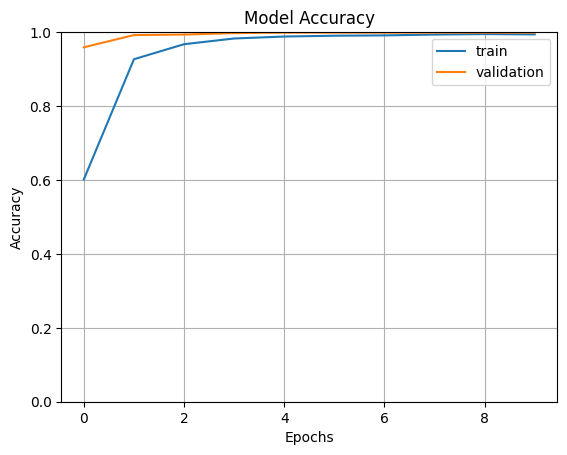

In [63]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

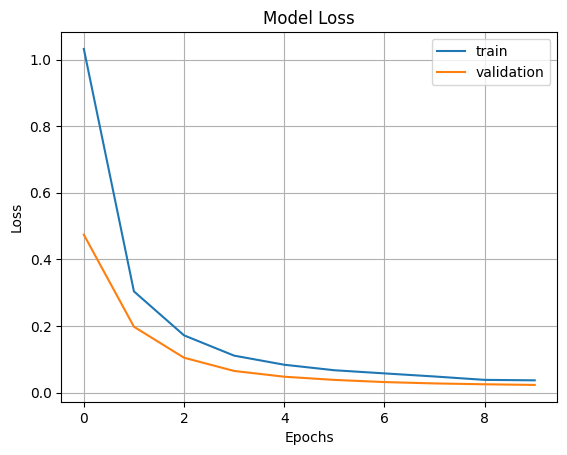

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

### 2.5. Подготовьте набор проверочных данных (examples)

In [84]:
examples=['/content/drive/MyDrive/Five_Pictures/Bottle_of_Whiskey.jpg',
          '/content/drive/MyDrive/Five_Pictures/Bottle_of_Wine.png',
          '/content/drive/MyDrive/Five_Pictures/Football_Helmet.jpg',
          '/content/drive/MyDrive/Five_Pictures/MIG-33_istrebitel.jpg',
          '/content/drive/MyDrive/Five_Pictures/Tank_Leklerk.jpg',]

In [88]:
X_val.shape

(755, 128, 128, 3)

24/24 [==============================] - 145s 6s/step


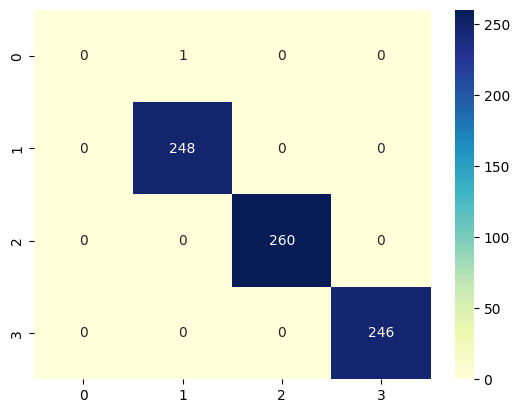

In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Получим прогнозы по валидационным даннным
Y_pred = my_model.predict(X_val, batch_size=32)

# Преобразуем вероятности в метки классов
Y_pred = Y_pred.argmax(axis=1)
valY = Y_val.argmax(axis=1)

# Вычисляем матрицу ошибок
conf_mat = confusion_matrix(valY, Y_pred)

# Визуализируем матрицу ошибок
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

In [90]:
from sklearn.metrics import classification_report
predictions = my_model.predict(X_val, batch_size=32)
print(classification_report(Y_val.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

24/24 [==============================] - 119s 5s/step
              precision    recall  f1-score   support

      Images       0.00      0.00      0.00         1
       anime       1.00      1.00      1.00       248
     cartoon       1.00      1.00      1.00       260
       human       1.00      1.00      1.00       246

    accuracy                           1.00       755
   macro avg       0.75      0.75      0.75       755
weighted avg       1.00      1.00      1.00       755



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
import pickle

def save_model_and_labels(model, lb, model_path = "model.h5", labels_path = "label_bin"):
    """
    Сохраняет модель машинного обучения и метки классов в бинарном формате на диск.

    Args:
        model: Модель машинного обучения.
        lb: Метки классов.
        model_path: Путь к файлу модели.
        labels_path: Путь к файлу меток.

    Returns:
        None.
    """

    # Сохранение модели
    model.save(model_path, save_format="h5")

    # Сохранение меток
    with open(labels_path, "wb") as f:
        f.write(pickle.dumps(lb))

In [92]:
model_path = "/content/gdrive/MyDrive/datasets_for_5/model.keras"
labels_path = "/content/gdrive/MyDrive/datasets_for_5/labels"

### 2.6. Реализуйте графический интерфейс для взаимодействия с обученной моделью, используя [Gradio](https://www.gradio.app/guides/image-classification-in-tensorflow). В качестве примеров (параметр examples в Gradio), используйте изображения из списка images (п.1.2.)

In [93]:
!pip install gradio --use-deprecated=legacy-resolver

In [94]:
def predict_image(img):

    """
    Функция для выполнения предсказания класса, возвращает
    словарь с вероятностями для каждого класса.

    Args:
    img: Изображение.
    preprocess_funk: Функция для предобработки изображения.
    model_path: Путь к файлу модели.
    label_path: Путь к файлу с метками.

    Returns:
    Словарь с метками и вероятностями для каждого класса.
    """

    local_model = load_model(model_path)  # Загрузка модели Keras
    # lb = pickle.loads(open(labels_path, "rb").read())  # Загрузка словаря с метками

    image = normalize_for_pred(img.copy(), (224, 224, 3), False)

    print(img.shape)

    preds = local_model.predict(image).flatten()

    print(preds)

    confidences = {labels[i]: float(preds[i]) for i in range(3)}
    return confidences

In [103]:
from keras.models import load_model
import gradio as gr
import pickle
import cv2

interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(label="Загрузите изображение"),
    examples = examples,
    outputs=gr.Label(num_top_classes=3))

interface.launch(debug=True, share=True)

AttributeError: module 'gradio' has no attribute 'Request'

# Задание 3. Классификация набора пространственных данных EuroSat (для магистров)

- Ссылка на датасет: https://github.com/phelber/eurosat

- Описание на kaggle: https://www.kaggle.com/datasets/apollo2506/eurosat-dataset

В этом задании Вам будет предоставлен набор данных EuroSat, который содержит снимки земной поверхности, снятые спутником Sentinel-2. Вам нужно будет обучить модель для классификации этих изображений на 10 классов, представляющих различные типы земного покрова.

### **3.1. Загрузка данных:**
  * [Скачайте](https://madm.dfki.de/files/sentinel/EuroSAT.zip) набор данных EuroSat
  * Разделите данные на обучающую, валидационную и тестовую выборки.



In [ ]:
# Ваш код

### **3.2. Выбор архитектуры нейронной сети:**
  * Выберите архитектуру нейронной сети, основанную на трансферном обучении, например, ResNet50, VGG16 или InceptionV3 ([полный список](https://keras.io/api/applications/)).
  * Загрузите предобученную модель выбранной архитектуры.


In [ ]:
# Ваш код

### **3.3. Дообучение модели:**
  * Добавьте к предобученной модели несколько слоев для классификации изображений EuroSat.
  * Обучите модель на обучающей выборке.

In [ ]:
# Ваш код



### **3.4. Оценка модели:**
  * Оцените производительность модели на валидационной и тестовой выборках.
  * Сравните результаты с другими архитектурами нейронных сетей.



In [ ]:
# Ваш код

### **3.5. Анализ результатов:**
  * Проанализируйте влияние различных параметров на производительность модели, таких как:
      * Количество эпох обучения
      * Размер пакета
      * Функция активации
      * Оптимизатор
      * Регуляризация

-----------------------------------------
**Ваш вывод**
-----------------------------------------
